# Feature selection for Linear Regression on the Possum Dataset with removing of outliers using RFECV

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.feature_selection import RFECV

## Read Possum data to dataframe

In [2]:
possum = pd.read_csv('possum.csv')
print(possum.head())

   case  site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  \
0     1     1  Vic   m  8.0     94.1    60.4      89.0   36.0      74.5   
1     2     1  Vic   f  6.0     92.5    57.6      91.5   36.5      72.5   
2     3     1  Vic   f  6.0     94.0    60.0      95.5   39.0      75.4   
3     4     1  Vic   f  6.0     93.2    57.1      92.0   38.0      76.1   
4     5     1  Vic   f  2.0     91.5    56.3      85.5   36.0      71.0   

   earconch   eye  chest  belly  
0      54.5  15.2   28.0   36.0  
1      51.2  16.0   28.5   33.0  
2      51.9  15.5   30.0   34.0  
3      52.2  15.2   28.0   34.0  
4      53.2  15.1   28.5   33.0  


## First preprocessing - delete 'case' column as it is just an index

In [3]:
possum = possum.drop('case', axis=1)
print(possum.head())

   site  Pop sex  age  hdlngth  skullw  totlngth  taill  footlgth  earconch  \
0     1  Vic   m  8.0     94.1    60.4      89.0   36.0      74.5      54.5   
1     1  Vic   f  6.0     92.5    57.6      91.5   36.5      72.5      51.2   
2     1  Vic   f  6.0     94.0    60.0      95.5   39.0      75.4      51.9   
3     1  Vic   f  6.0     93.2    57.1      92.0   38.0      76.1      52.2   
4     1  Vic   f  2.0     91.5    56.3      85.5   36.0      71.0      53.2   

    eye  chest  belly  
0  15.2   28.0   36.0  
1  16.0   28.5   33.0  
2  15.5   30.0   34.0  
3  15.2   28.0   34.0  
4  15.1   28.5   33.0  


# TODO: Split the data in train and test set first and do the preprocessing separately for each set!

## Handle missing data

### count missing values

In [4]:
print(possum.isna().sum())

site        0
Pop         0
sex         0
age         2
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    1
earconch    0
eye         0
chest       0
belly       0
dtype: int64


### calculate threshold for dropping observations with missing values

In [5]:
treshold = len(possum) * 0.05
print(treshold)

5.2


### drop all rows with missing values for columns below treshold

In [6]:
cols_to_drop = possum.columns[possum.isna().sum() <= treshold]
print(cols_to_drop)

Index(['site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill',
       'footlgth', 'earconch', 'eye', 'chest', 'belly'],
      dtype='object')


In [7]:
possum.dropna(subset=cols_to_drop, inplace=True)

In [8]:
print(possum.isna().sum())

site        0
Pop         0
sex         0
age         0
hdlngth     0
skullw      0
totlngth    0
taill       0
footlgth    0
earconch    0
eye         0
chest       0
belly       0
dtype: int64


## Identify and remove outliers

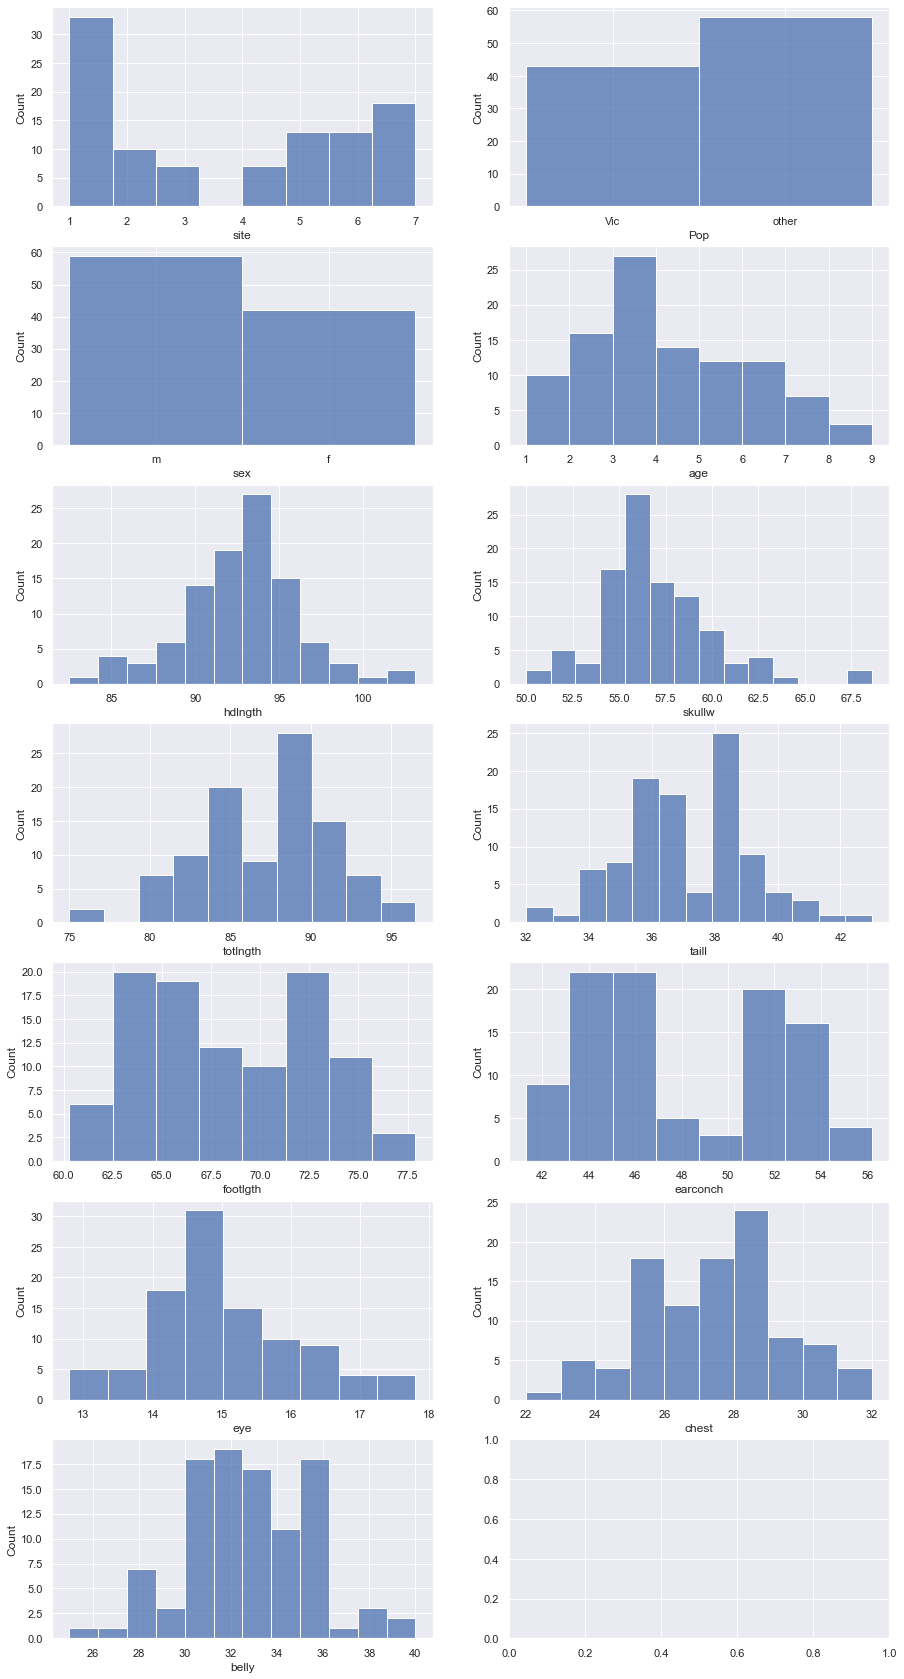

In [9]:
sns.set(style="darkgrid")
fig, axs = plt.subplots(7, 2, figsize=(15, 30))
sns.histplot(data=possum, x='site', ax=axs[0, 0])
sns.histplot(data=possum, x='Pop', ax=axs[0, 1])
sns.histplot(data=possum, x='sex', ax=axs[1, 0])
sns.histplot(data=possum, x='age', ax=axs[1, 1])
sns.histplot(data=possum, x='hdlngth', ax=axs[2, 0])
sns.histplot(data=possum, x='skullw', ax=axs[2, 1])
sns.histplot(data=possum, x='totlngth', ax=axs[3, 0])
sns.histplot(data=possum, x='taill', ax=axs[3, 1])
sns.histplot(data=possum, x='footlgth', ax=axs[4, 0])
sns.histplot(data=possum, x='earconch', ax=axs[4, 1])
sns.histplot(data=possum, x='eye', ax=axs[5, 0])
sns.histplot(data=possum, x='chest', ax=axs[5, 1])
sns.histplot(data=possum, x='belly', ax=axs[6, 0])
plt.show()

site, Pop and sex are categorical data and needs to be converted. For numerical data skullw and totlngth seem to have outliers.

### remove outliers from skullw

Detect and remove outliers with standard deviation based detection. Calculate mean and standard deviation (std) for skullw and drop all values that are below / above 3 * std.

In [10]:
mean = possum['skullw'].mean()
print(mean)
std = possum['skullw'].std()
print(std)

56.96039603960398
3.1026788170199247


In [11]:
cut_off = 3 * std
print(cut_off)

9.308036451059774


In [12]:
lower, upper = mean - cut_off, mean + cut_off
print(lower)
print(upper)

47.6523595885442
66.26843249066376


In [13]:
print(possum['skullw'].min())
print(possum['skullw'].max())

50.0
68.6


As the maximum value of skullw lies above the upper boundary we have outliers to remove.

In [14]:
possum = possum[(possum['skullw'] < upper) & (possum['skullw'] > lower)]

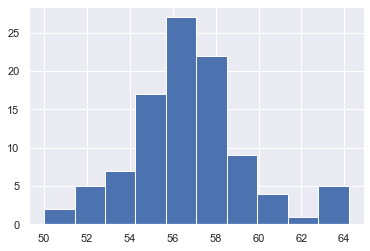

In [15]:
possum['skullw'].hist()
plt.show()

### remove outliers from totlngth

In [16]:
mean = possum['totlngth'].mean()
print(mean)
std = possum['totlngth'].std()
print(std)

87.27979797979799
4.220503398691109


In [17]:
cut_off = 3 * std
print(cut_off)

12.661510196073328


In [18]:
lower, upper = mean - cut_off, mean + cut_off
print(lower)
print(upper)

74.61828778372467
99.94130817587131


In [19]:
print(possum['totlngth'].min())
print(possum['totlngth'].max())

75.0
96.5


As we can see the minimum and maximum values of totlngth are already between the lower and upper boundaries so we don't have outliers to remove.

### Rearrange columns of possum dataframe so that target hdlength is at last position

In [20]:
print(possum.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      99 non-null     int64  
 1   Pop       99 non-null     object 
 2   sex       99 non-null     object 
 3   age       99 non-null     float64
 4   hdlngth   99 non-null     float64
 5   skullw    99 non-null     float64
 6   totlngth  99 non-null     float64
 7   taill     99 non-null     float64
 8   footlgth  99 non-null     float64
 9   earconch  99 non-null     float64
 10  eye       99 non-null     float64
 11  chest     99 non-null     float64
 12  belly     99 non-null     float64
dtypes: float64(10), int64(1), object(2)
memory usage: 10.8+ KB
None


In [21]:
temp_cols = possum.columns.tolist()
print(temp_cols)

['site', 'Pop', 'sex', 'age', 'hdlngth', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly']


In [22]:
new_cols = temp_cols[0:4] + temp_cols[5:] + temp_cols[4:5]
print(new_cols)

['site', 'Pop', 'sex', 'age', 'skullw', 'totlngth', 'taill', 'footlgth', 'earconch', 'eye', 'chest', 'belly', 'hdlngth']


In [23]:
possum = possum[new_cols]
print(possum.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      99 non-null     int64  
 1   Pop       99 non-null     object 
 2   sex       99 non-null     object 
 3   age       99 non-null     float64
 4   skullw    99 non-null     float64
 5   totlngth  99 non-null     float64
 6   taill     99 non-null     float64
 7   footlgth  99 non-null     float64
 8   earconch  99 non-null     float64
 9   eye       99 non-null     float64
 10  chest     99 non-null     float64
 11  belly     99 non-null     float64
 12  hdlngth   99 non-null     float64
dtypes: float64(10), int64(1), object(2)
memory usage: 10.8+ KB
None


## Convert categorical data

In [24]:
print(possum.info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 99 entries, 0 to 103
Data columns (total 13 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   site      99 non-null     int64  
 1   Pop       99 non-null     object 
 2   sex       99 non-null     object 
 3   age       99 non-null     float64
 4   skullw    99 non-null     float64
 5   totlngth  99 non-null     float64
 6   taill     99 non-null     float64
 7   footlgth  99 non-null     float64
 8   earconch  99 non-null     float64
 9   eye       99 non-null     float64
 10  chest     99 non-null     float64
 11  belly     99 non-null     float64
 12  hdlngth   99 non-null     float64
dtypes: float64(10), int64(1), object(2)
memory usage: 10.8+ KB
None


#### => We have to deal with Pop and sex. What about site?

In [25]:
print(possum['site'].nunique())

7


Site contains categorical data encoded as ordinal data. Since there is no natural order between the values of site, it may be better to use OneHotEncoding.

####  convert 'Pop' and 'sex' 

In [26]:
print(possum['Pop'].nunique())
print(possum['sex'].nunique())

2
2


Pop and sex contain categorical data with no natural order between the values, so we should use OneHotEncoding (or in this case LabelEncoding as well, as there are just 2 values for each Pop and sex and a LabelEncoding would result in 0 - 1 values.)

In [27]:
#ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [0, 1, 2])], remainder='passthrough')
ct = ColumnTransformer(transformers=[('encoder', OneHotEncoder(), [1, 2])], remainder='passthrough')
X = np.array(ct.fit_transform(possum))
print(X)

[[ 1.   0.   0.  ... 28.  36.  94.1]
 [ 1.   0.   1.  ... 28.5 33.  92.5]
 [ 1.   0.   1.  ... 30.  34.  94. ]
 ...
 [ 0.   1.   1.  ... 25.  30.  92.4]
 [ 0.   1.   0.  ... 25.  29.  91.5]
 [ 0.   1.   1.  ... 28.5 33.5 93.6]]


We now have a numpy matrix with only numerical data and without missing values that we can buil our Regression models from.

### Feature selection techniques

#### 2. Wrapper methods using Recursive feature elimination with cross validation

First step: split the data into training and test set. This has to be done before feature selection.

In [28]:
y = X[0:, -1:]
X = X[0:, 0:-1]
print(X)
print(y)

[[ 1.   0.   0.  ... 15.2 28.  36. ]
 [ 1.   0.   1.  ... 16.  28.5 33. ]
 [ 1.   0.   1.  ... 15.5 30.  34. ]
 ...
 [ 0.   1.   1.  ... 13.  25.  30. ]
 [ 0.   1.   0.  ... 15.4 25.  29. ]
 [ 0.   1.   1.  ... 14.8 28.5 33.5]]
[[ 94.1]
 [ 92.5]
 [ 94. ]
 [ 93.2]
 [ 91.5]
 [ 93.1]
 [ 95.3]
 [ 94.8]
 [ 93.4]
 [ 91.8]
 [ 93.3]
 [ 94.9]
 [ 95.1]
 [ 95.4]
 [ 92.9]
 [ 91.6]
 [ 93.5]
 [ 94.4]
 [ 94.8]
 [ 95.9]
 [ 96.3]
 [ 92.5]
 [ 94.4]
 [ 95.8]
 [ 96. ]
 [ 90.5]
 [ 93.8]
 [ 92.8]
 [ 92.1]
 [ 92.8]
 [ 94.3]
 [ 91.4]
 [ 90.6]
 [ 94.4]
 [ 93.3]
 [ 89.3]
 [ 92.4]
 [ 84.7]
 [ 91. ]
 [ 85.3]
 [ 90. ]
 [ 90.7]
 [ 90.1]
 [ 98.6]
 [ 95.4]
 [ 91.6]
 [ 95.6]
 [ 97.6]
 [ 93.1]
 [ 96.9]
 [103.1]
 [ 99.9]
 [ 95.1]
 [ 94.5]
 [102.5]
 [ 91.3]
 [ 95.7]
 [ 91.3]
 [ 92. ]
 [ 96.9]
 [ 93.5]
 [ 90.4]
 [ 93.3]
 [ 94.1]
 [ 98. ]
 [ 91.9]
 [ 92.8]
 [ 85.9]
 [ 82.5]
 [ 88.7]
 [ 93.8]
 [ 92.4]
 [ 93.6]
 [ 86.5]
 [ 85.8]
 [ 86.7]
 [ 90.6]
 [ 86. ]
 [ 90. ]
 [ 88.4]
 [ 89.5]
 [ 88.2]
 [ 98.5]
 [ 89.6]
 [ 97.7]
 [ 92.6

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=0)

After this apply feature selection. Define estimator model for target hdlngth, then apply it to RFECV class. Then fit the model and extract selected features.

In [30]:
#regressor = RandomForestRegressor()
#regressor = DecisionTreeRegressor()
regressor = LinearRegression()
selector = RFECV(regressor, step=1, cv=5)
selector = selector.fit(X_train, np.ravel(y_train))

#### show ranking of best features

In [31]:
print(selector.ranking_)
print(selector.support_)

[ 1  2  3  1  9  7  1  1  1  8  5  6  4 10]
[ True False False  True False False  True  True  True False False False
 False False]


In [32]:
X_train = selector.transform(X_train)
print(X_train)

[[ 0.   0.  58.1 91.  38. ]
 [ 1.   1.  58.2 89.5 36. ]
 [ 0.   0.  59.9 89.  40. ]
 [ 0.   1.  60.7 93.  41.5]
 [ 0.   1.  56.  85.5 38. ]
 [ 0.   0.  57.4 88.5 38. ]
 [ 0.   1.  56.2 92.  40.5]
 [ 0.   1.  57.6 84.  35.5]
 [ 0.   1.  52.3 82.  36.5]
 [ 0.   1.  61.5 93.7 38. ]
 [ 1.   0.  56.  88.  35. ]
 [ 1.   0.  56.3 89.  38. ]
 [ 0.   1.  59.  86.  38. ]
 [ 0.   1.  56.  88.5 38. ]
 [ 0.   1.  50.  81.  36.5]
 [ 1.   0.  57.6 91.5 36.5]
 [ 0.   0.  55.8 86.  36.5]
 [ 0.   1.  54.8 89.  37.5]
 [ 1.   1.  55.9 81.  34. ]
 [ 1.   0.  56.3 85.5 36. ]
 [ 1.   1.  56.  86.  34.5]
 [ 1.   0.  55.4 90.5 35. ]
 [ 1.   0.  55.5 81.  32. ]
 [ 1.   0.  55.  84.5 36. ]
 [ 1.   0.  54.8 90.5 35.5]
 [ 0.   1.  56.6 88.5 37.5]
 [ 0.   0.  56.5 89.5 38.5]
 [ 1.   1.  60.4 89.  36. ]
 [ 1.   1.  59.3 88.  35. ]
 [ 1.   0.  54.4 84.  33.5]
 [ 0.   1.  63.2 92.5 38. ]
 [ 1.   0.  55.6 92.  35.5]
 [ 1.   0.  54.8 82.5 35. ]
 [ 1.   1.  58.5 91.5 35.5]
 [ 0.   0.  59.4 93.  41. ]
 [ 1.   0.  57.2 89.

#### build model and make prediction with these features

In [33]:
regressor.fit(X_train, y_train)
X_test = selector.transform(X_test)
y_pred = regressor.predict(X_test)

In [34]:
print(r2_score(y_test, y_pred))

0.645349765249544
